IMPORTING PACKAGES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns

READING THE DATASET

In [3]:
ud=pd.read_csv("UberData.csv")
ud['Date']=pd.to_datetime(ud['Date'])
ud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               1000 non-null   datetime64[ns]
 1   Time                               1000 non-null   object        
 2   Booking ID                         1000 non-null   object        
 3   Booking Status                     1000 non-null   object        
 4   Customer ID                        1000 non-null   object        
 5   Vehicle Type                       1000 non-null   object        
 6   Pickup Location                    996 non-null    object        
 7   Drop Location                      997 non-null    object        
 8   Avg Vehicle Turnaround Time        994 non-null    float64       
 9   Avg Customer Turnaround Time       991 non-null    float64       
 10  Cancelled Rides by Customer        10

DATA CLEANING

SUM OF THE NULL VALUES

In [4]:
print(ud.isnull().sum())

Date                                 0
Time                                 0
Booking ID                           0
Booking Status                       0
Customer ID                          0
Vehicle Type                         0
Pickup Location                      4
Drop Location                        3
Avg Vehicle Turnaround Time          6
Avg Customer Turnaround Time         9
Cancelled Rides by Customer          0
Reason for cancelling by Customer    0
Cancelled Rides by Driver            0
Driver Cancellation Reason           0
Incomplete Rides                     0
Incomplete Rides Reason              0
Booking Value                        4
Ride Distance                        6
Driver Ratings                       5
Customer Rating                      1
Payment Method                       0
dtype: int64


SEPARATING NUMERIC AND NON-NUMERIC COLUMNS

In [5]:
numeric=ud.select_dtypes(include=['number']).columns
print(numeric)
nonumeric=ud.select_dtypes(exclude=['number']).columns
print(nonumeric)

Index(['Avg Vehicle Turnaround Time', 'Avg Customer Turnaround Time',
       'Cancelled Rides by Customer', 'Cancelled Rides by Driver',
       'Incomplete Rides', 'Booking Value', 'Ride Distance', 'Driver Ratings',
       'Customer Rating'],
      dtype='object')
Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location',
       'Reason for cancelling by Customer', 'Driver Cancellation Reason',
       'Incomplete Rides Reason', 'Payment Method'],
      dtype='object')


FILLING THE MISSING VALUES

Filling using Mean values

In [6]:
fillmean=SimpleImputer(strategy='mean')
ud[numeric]=fillmean.fit_transform(ud[numeric])
ud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               1000 non-null   datetime64[ns]
 1   Time                               1000 non-null   object        
 2   Booking ID                         1000 non-null   object        
 3   Booking Status                     1000 non-null   object        
 4   Customer ID                        1000 non-null   object        
 5   Vehicle Type                       1000 non-null   object        
 6   Pickup Location                    996 non-null    object        
 7   Drop Location                      997 non-null    object        
 8   Avg Vehicle Turnaround Time        1000 non-null   float64       
 9   Avg Customer Turnaround Time       1000 non-null   float64       
 10  Cancelled Rides by Customer        10

Filling using Mode Values

In [7]:
fillmode=SimpleImputer(strategy='most_frequent')
ud[nonumeric]=fillmode.fit_transform(ud[nonumeric])
ud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               1000 non-null   datetime64[ns]
 1   Time                               1000 non-null   object        
 2   Booking ID                         1000 non-null   object        
 3   Booking Status                     1000 non-null   object        
 4   Customer ID                        1000 non-null   object        
 5   Vehicle Type                       1000 non-null   object        
 6   Pickup Location                    1000 non-null   object        
 7   Drop Location                      1000 non-null   object        
 8   Avg Vehicle Turnaround Time        1000 non-null   float64       
 9   Avg Customer Turnaround Time       1000 non-null   float64       
 10  Cancelled Rides by Customer        10

SUMMARY STATISTICS

In [8]:
ud.describe()

,Date,Avg Vehicle Turnaround Time,Avg Customer Turnaround Time,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2024-06-28 23:06:43.200000,8.327295,28.613914,0.068000,0.176000,0.059000,483.706560,25.468896,4.223839,4.404744
min,2024-01-01 00:00:00,2.000000,10.100000,0.000000,0.000000,0.000000,51.000000,1.240000,3.000000,3.000000
25%,2024-04-01 00:00:00,5.400000,24.100000,0.000000,0.000000,0.000000,302.000000,18.015000,4.200000,4.300000
50%,2024-06-27 00:00:00,8.321474,28.615751,0.000000,0.000000,0.000000,483.456647,25.461286,4.224645,4.404739
75%,2024-09-20 06:00:00,10.925000,32.175000,0.000000,0.000000,0.000000,499.250000,32.227500,4.300000,4.600000
max,2024-12-30 00:00:00,20.000000,44.900000,1.000000,1.000000,1.000000,2908.000000,49.950000,5.000000,5.000000
std,NaN,3.504093,7.348627,0.251872,0.381011,0.235743,307.685305,11.784485,0.343314,0.347716


In [9]:
ud['Booking Value'].mean()
ud['Ride Distance'].mean()
ud['Driver Ratings'].mean()

np.float64(4.22383910080402)

VISUALIZING USING PLOTS

Booking Status using Bar Plot

Booking Status
Cancelled by Customer     68
Cancelled by Driver      176
Completed                633
Incomplete                59
No Driver Found           64
Name: Booking ID, dtype: int64


Text(0.5, 1.0, 'Booking Status')

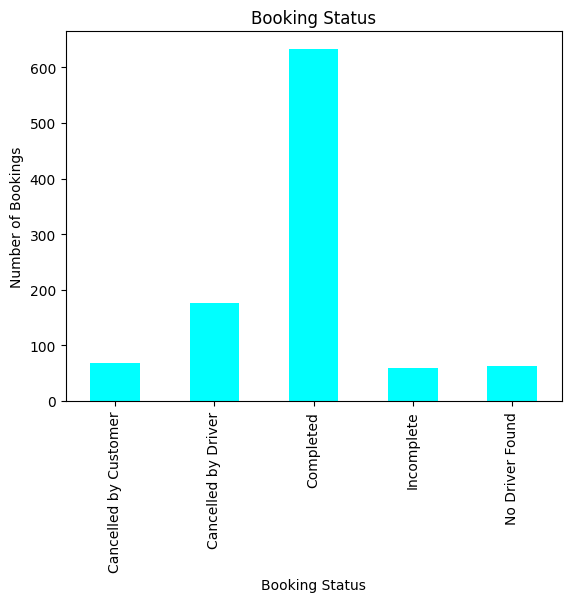

In [10]:
status_count=ud.groupby('Booking Status')['Booking ID'].count()
print(status_count)
status_count.plot(kind='bar', color='cyan')
plt.ylabel("Number of Bookings")
plt.title('Booking Status')

Most Booked Vehicles using Horizontal Bar Chart

Vehicle Type
Go Mini          495.837516
Bike             492.598829
Auto             483.604481
Premier Sedan    480.110625
eBike            473.284090
Go Sedan         472.038326
Uber XL          471.947495
Name: Booking Value, dtype: float64


<Axes: ylabel='Vehicle Type'>

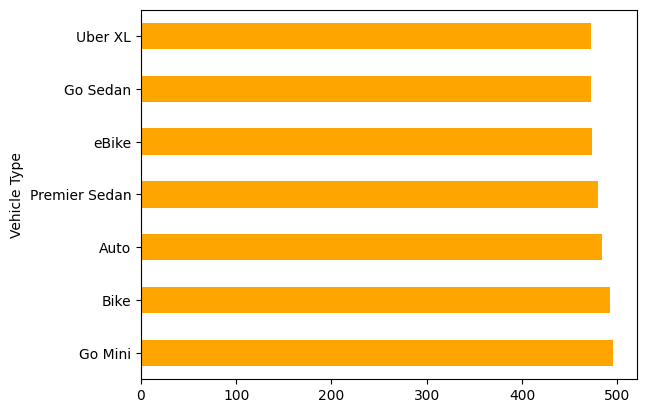

In [11]:
vehicle_value=ud.groupby('Vehicle Type')['Booking Value'].mean().sort_values(ascending=False)
print(vehicle_value)
vehicle_value.plot(kind='barh',color='orange')

Number of Rides by pickup location using Density Chart

Pickup Location
AIIMS                8
Adarsh Nagar        10
Akshardham           7
Anand Vihar          5
Anand Vihar ISBT     8
                    ..
Vidhan Sabha         4
Vinobapuri           6
Vishwavidyalaya      6
Welcome              3
Yamuna Bank          4
Name: Booking ID, Length: 174, dtype: int64


<Axes: ylabel='Density'>

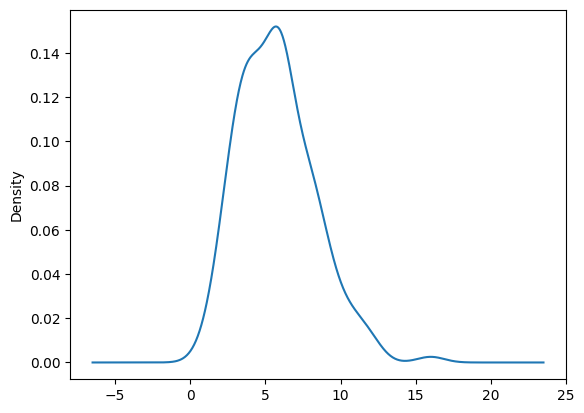

In [12]:
pickup_count=ud.groupby('Pickup Location')['Booking ID'].count()
print(pickup_count)
pickup_count.plot(kind='density')

Total Revenue using Line Chart

Payment Method
Cash            77858.000000
Credit Card     22831.000000
Debit Card      38872.000000
UPI            297809.560346
Uber Wallet     46336.000000
Name: Booking Value, dtype: float64


<Axes: xlabel='Payment Method'>

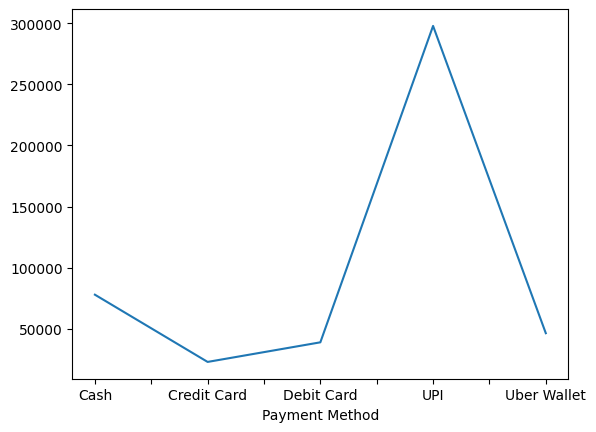

In [13]:
payment_revenue=ud.groupby('Payment Method')['Booking Value'].sum()
print(payment_revenue)
payment_revenue.plot(kind='line')

Average Ratings by Vehicle Type in Pie Chart

Vehicle Type
Auto             4.227222
Bike             4.197650
Go Mini          4.230077
Go Sedan         4.244414
Premier Sedan    4.240791
Uber XL          4.200875
eBike            4.162940
Name: Driver Ratings, dtype: float64


<Axes: ylabel='Driver Ratings'>

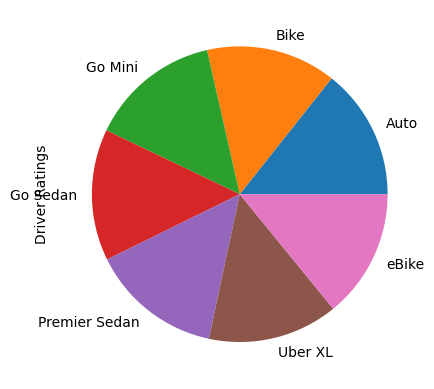

In [14]:
avg_vehicle_ratings=ud.groupby('Vehicle Type')['Driver Ratings'].mean()
print(avg_vehicle_ratings)
avg_vehicle_ratings.plot(kind='pie')

In [15]:
summary=ud.groupby('Vehicle Type').agg({
    'Booking ID':'count',
    'Booking Value':'mean',
    'Ride Distance':'mean',
    'Driver Ratings':'mean'
})
summary


,Booking ID,Booking Value,Ride Distance,Driver Ratings
Vehicle Type,,,,
Auto,266,483.604481,24.853803,4.227222
Bike,146,492.598829,27.275507,4.197650
Go Mini,187,495.837516,25.613829,4.230077
Go Sedan,184,472.038326,24.480421,4.244414
Premier Sedan,132,480.110625,26.176800,4.240791
Uber XL,24,471.947495,21.376155,4.200875
eBike,61,473.284090,26.442807,4.162940
